## Libraries

First, we need to install the following libraries:

- [matplotlib](/matplotlib): for plot customization
- [pandas](/pandas): for data manipulation
- [geopandas](/597-introduction-to-geopandas): for geodata manipulation and plotting
- [pypalettes](/intoduction-to-pypalettes): for the colors
- [pyfonts](/pyfonts): for the fonts


In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pypalettes import load_cmap
from pyfonts import load_google_font

## Dataset

First of all, we need two sets of data: one for the counties and one for the states.


In [2]:
path = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/us-counties-employmentrate.geojson"
path = "../../static/data/us-counties-employmentrate.geojson"
uscounties = gpd.read_file(path)
uscounties.head()

NAME_ALT  ADM2_CODE       state               county  rate  \
0       Whatcom County  USA-53073  Washington       Whatcom County   6.3   
1      Okanogan County  USA-53047  Washington      Okanogan County   6.1   
2         Ferry County  USA-53019  Washington         Ferry County   9.8   
3       Stevens County  USA-53065  Washington       Stevens County   7.9   
4  Pend Oreille County  USA-53051  Washington  Pend Oreille County   8.9   

   quartile                                           geometry  
0         3  MULTIPOLYGON (((-122.75302 48.99251, -122.6532...  
1         3  POLYGON ((-120.85196 48.99251, -120.67495 48.9...  
2         4  POLYGON ((-118.83688 48.99251, -118.69668 48.9...  
3         4  POLYGON ((-118.21996 48.99251, -118.03723 48.9...  
4         4  POLYGON ((-117.42951 48.99251, -117.37787 48.9...

In [3]:
path = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/us-states-employmentrate.geojson"
path = "../../static/data/us-states-employmentrate.geojson"
usstates = gpd.read_file(path)
usstates.head()

state      rate  quartile  \
0     Alabama  6.449254         4   
1      Alaska  7.036000         4   
2     Arizona  8.533333         4   
3    Arkansas  4.496000         1   
4  California  6.527586         4   

                                            geometry  
0  MULTIPOLYGON (((-87.41958 30.4796, -87.42683 3...  
1  MULTIPOLYGON (((-141.00556 69.65095, -141.0054...  
2  POLYGON ((-111.00627 31.32718, -111.06712 31.3...  
3  POLYGON ((-90.30422 35.00008, -90.30124 34.995...  
4  MULTIPOLYGON (((-114.72428 32.71284, -114.7645...

## Simple double map

We start by creating a **figure with 2 subplots**.

The first subplot will contain the **map with counties**, and the second subplot will contain the **map with states**.


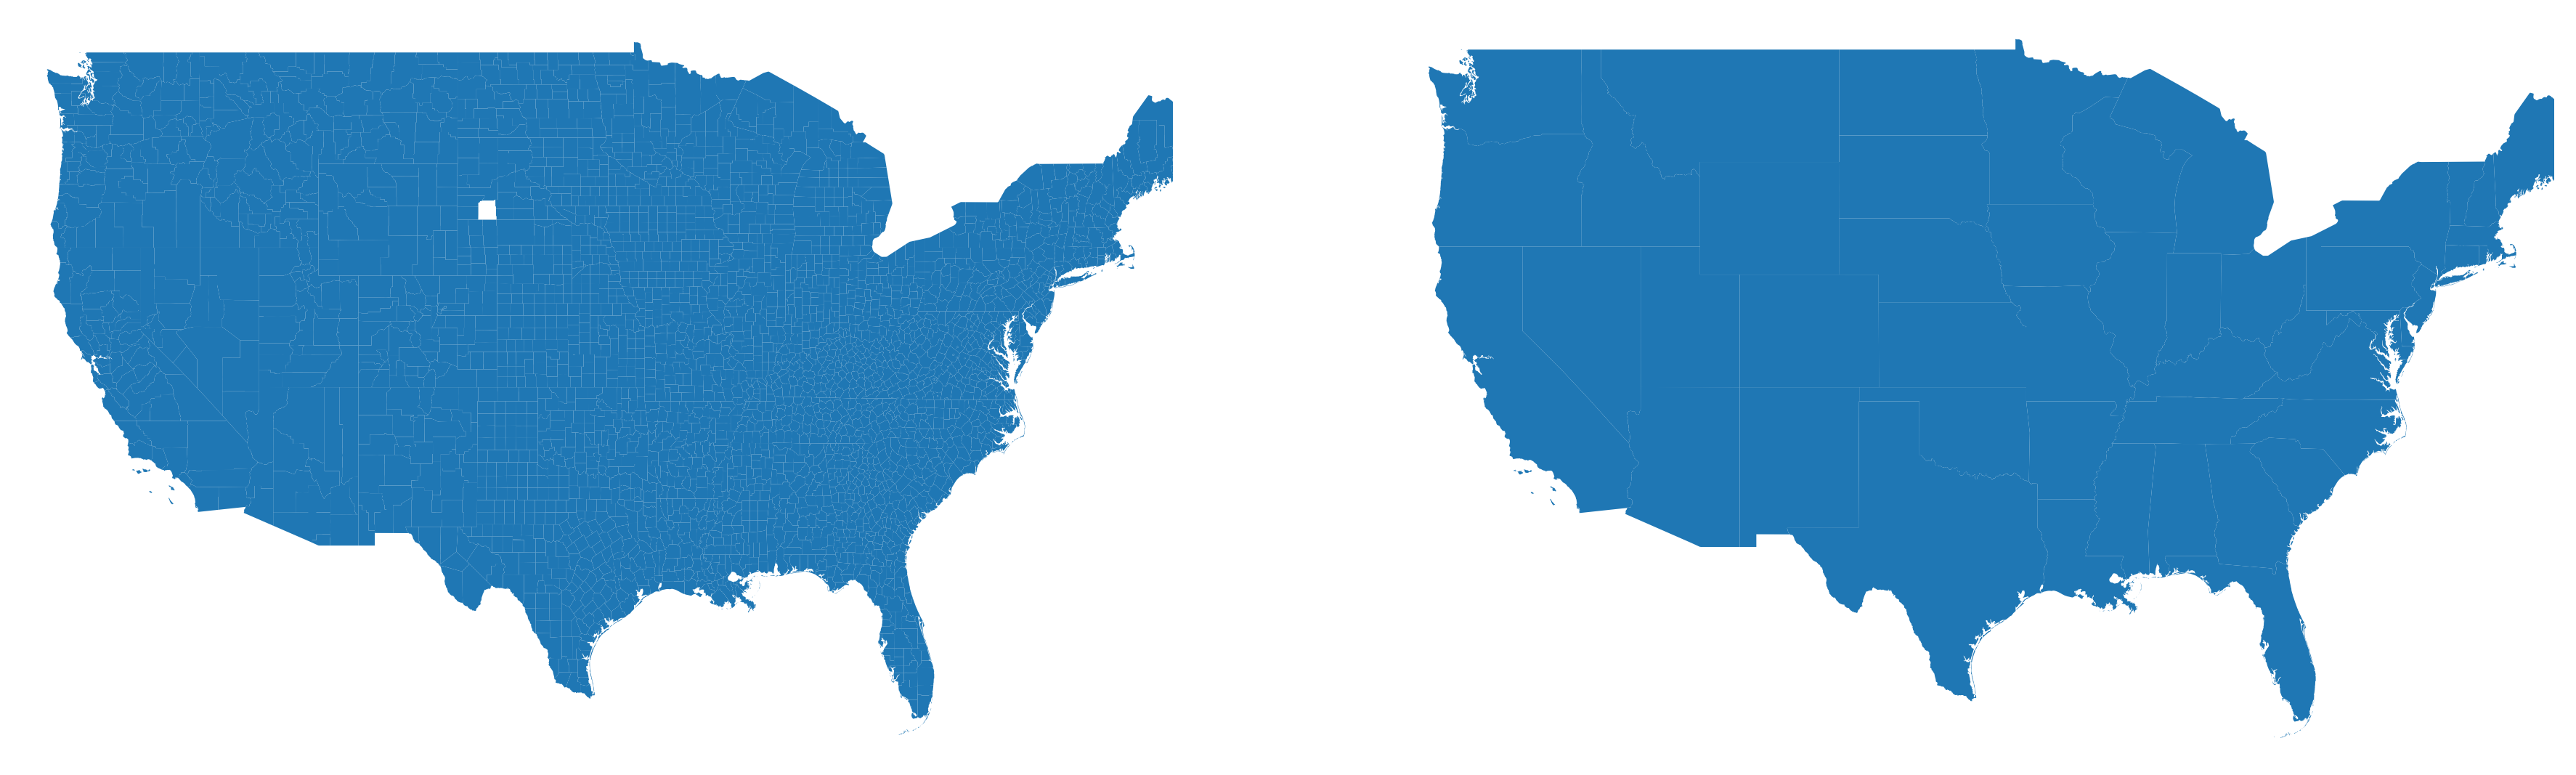

In [4]:
fig, axs = plt.subplots(ncols=2, dpi=300, figsize=(15, 10))

uscounties.plot(ax=axs[0])
usstates.plot(ax=axs[1])

for i in range(2):
    ax = axs[i]

    ax.set_xlim(-126, -68)
    ax.set_ylim(24, 50)
    ax.set_axis_off()

plt.show()

## Custom color map

Customizing colors is super easy thanks to [pypalettes](/introduction-to-pypalettes)!

Here, we want to use the ‘Coconut’ palette and specify the column from our previous data images to map to the palette (here "quartile").


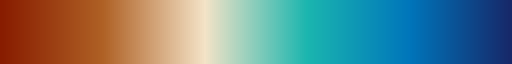

In [5]:
cmap = load_cmap("Coconut", cmap_type="continuous")
cmap

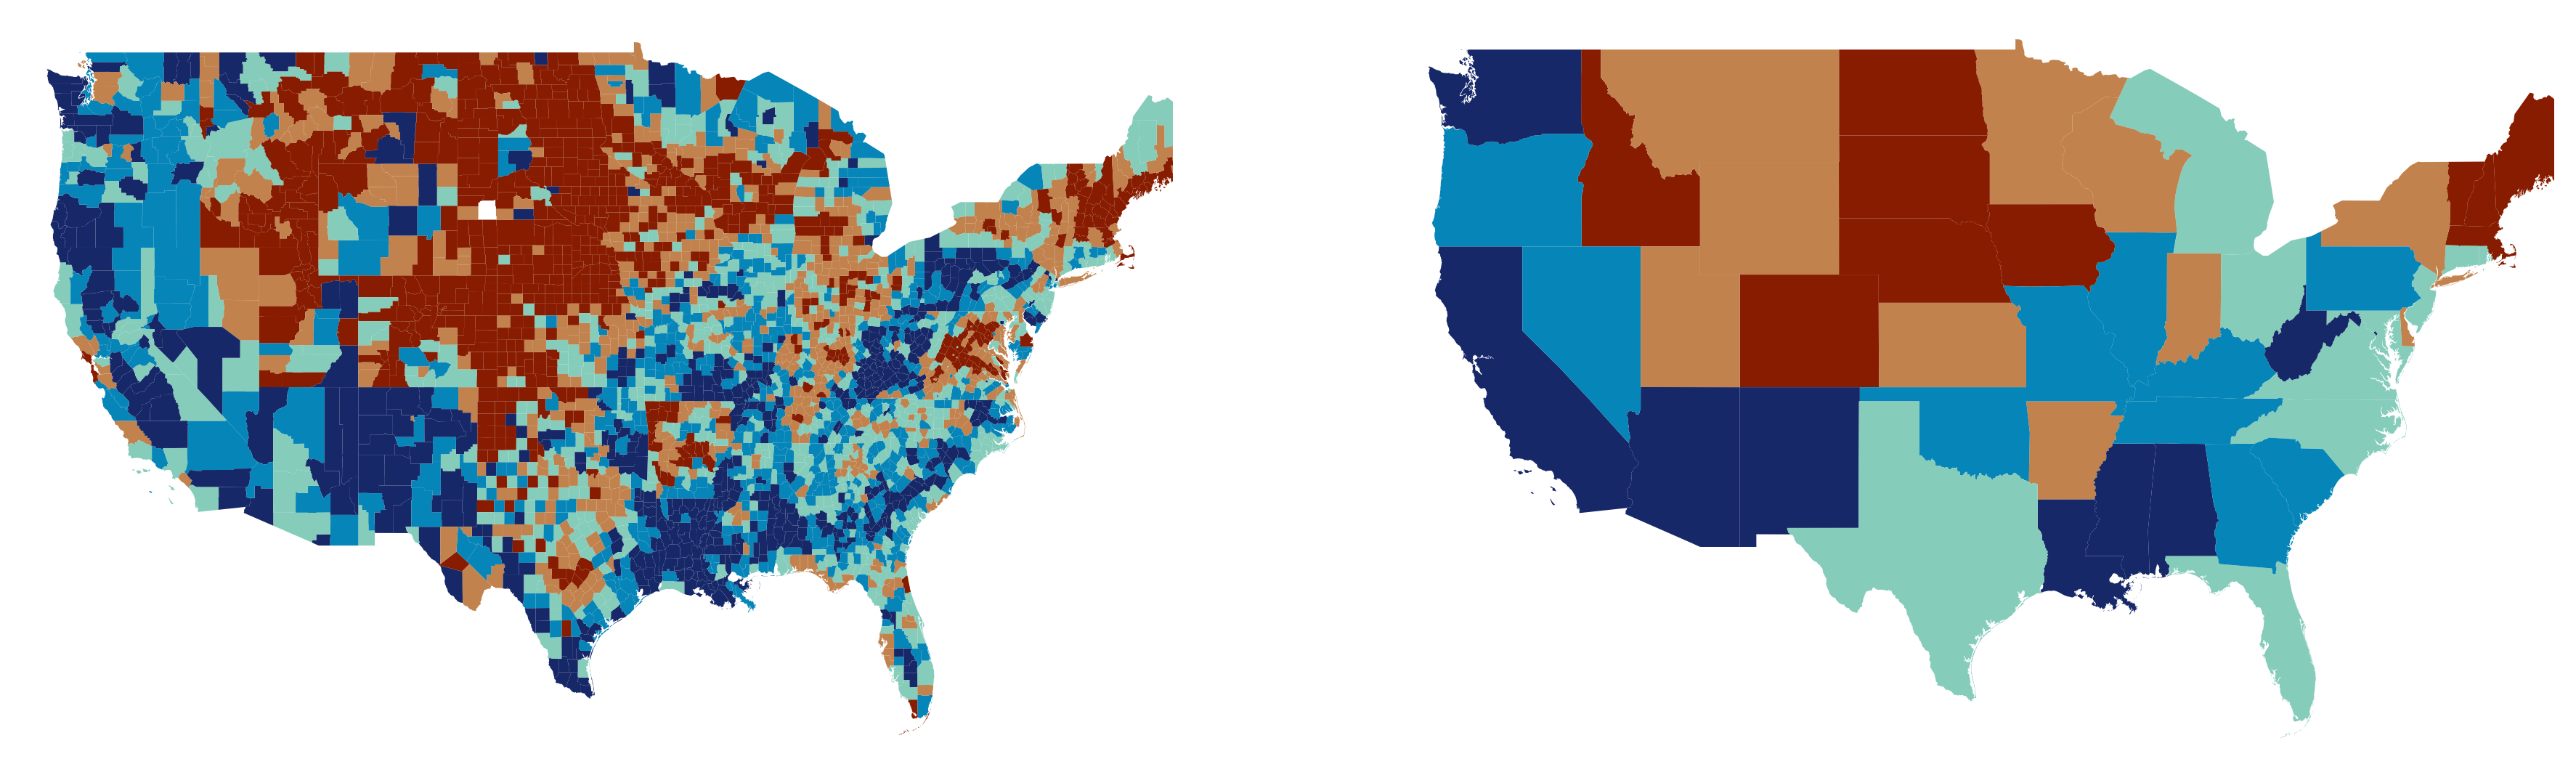

In [6]:
fig, axs = plt.subplots(ncols=2, dpi=300, figsize=(15, 10))

map_args = dict(column="quartile", cmap=cmap)
uscounties.plot(ax=axs[0], **map_args)
usstates.plot(ax=axs[1], **map_args)

for i in range(2):
    ax = axs[i]

    ax.set_xlim(-126, -68)
    ax.set_ylim(24, 50)
    ax.set_axis_off()

plt.show()

## Title and description

The title and description are added using the `text()` function. We also add a **short label** for each map (‘counties’ and ‘states’) in the `for` loop.


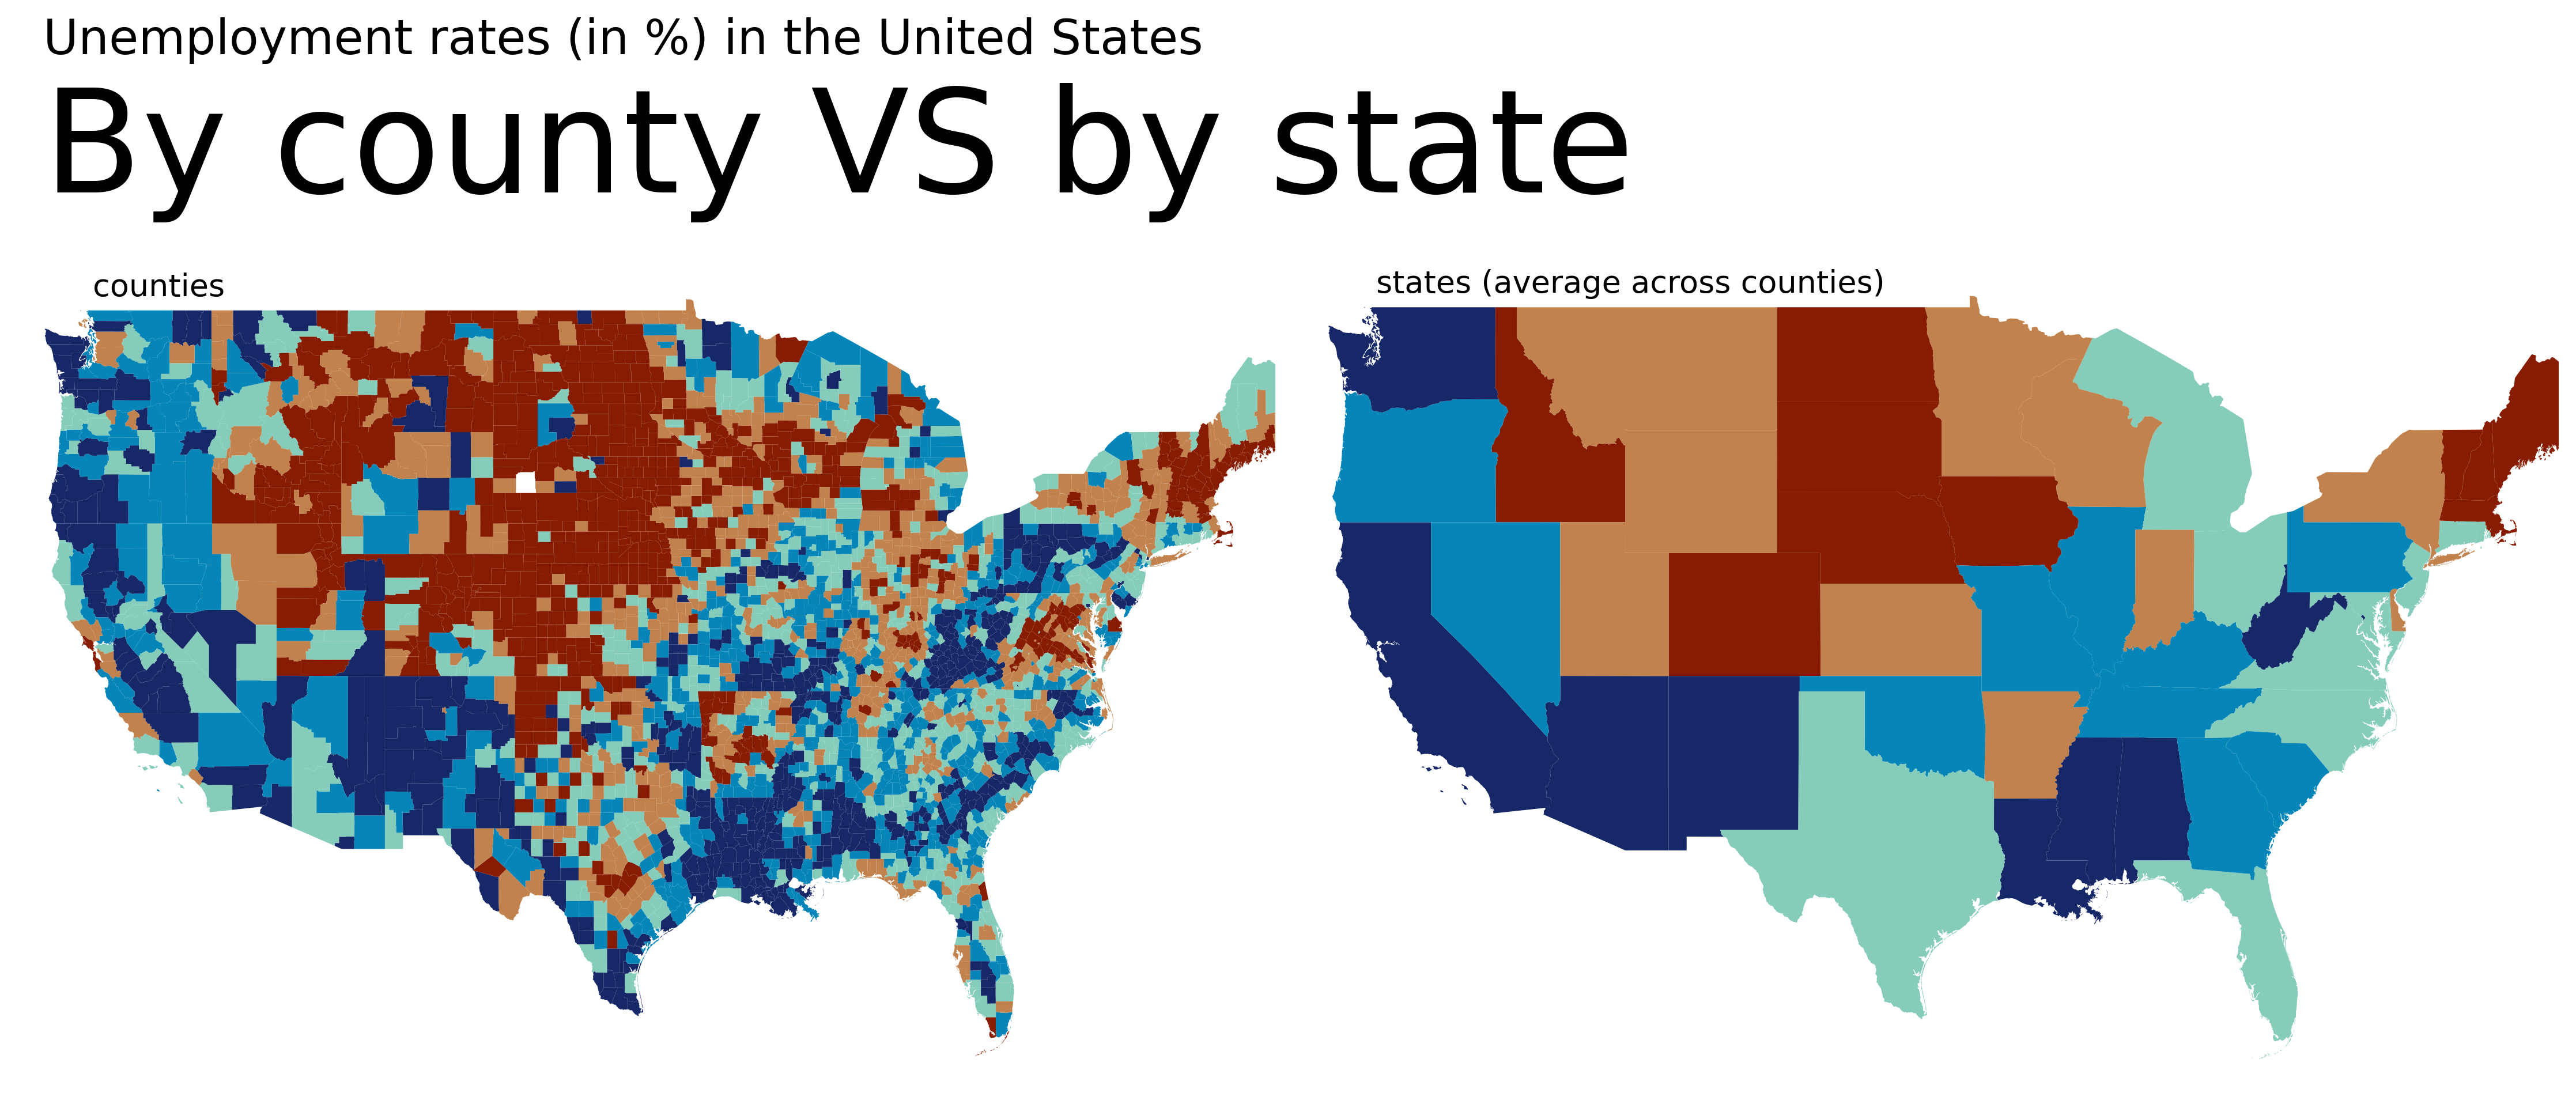

In [7]:
cmap = load_cmap("Coconut", cmap_type="continuous")

fig, axs = plt.subplots(ncols=2, dpi=300, figsize=(15, 10))

map_args = dict(column="quartile", cmap=cmap)
uscounties.plot(ax=axs[0], **map_args)
usstates.plot(ax=axs[1], **map_args)

metrics = ["counties", "states (average across counties)"]
for i in range(2):
    ax = axs[i]

    ax.set_xlim(-126, -68)
    ax.set_ylim(24, 50)
    ax.set_axis_off()

    ax.text(
        x=0.06,
        y=0.98,
        s=f"{metrics[i]}",
        transform=ax.transAxes,
        size=13,
    )

fig.text(
    x=0.02,
    y=0.78,
    s="By county VS by state",
    ha="left",
    size=60,
)
fig.text(
    x=0.02,
    y=0.86,
    s="Unemployment rates (in %) in the United States",
    ha="left",
    size=20,
)

plt.tight_layout()
plt.show()

## Better annotations with custom font

The default matplotlib font isn't the best, so we need other fonts using [pyfonts](/pyfonts)! You **don't need to install anything**, all you need is an internet connection.

We load 3 differents fonts: a light one, a bold one and an italic one.


In [8]:
fontlight = load_google_font("Urbanist", weight="light")
fontbold = load_google_font("Urbanist", weight="bold")
fontitalic = load_google_font("Urbanist", weight="light", italic=True)

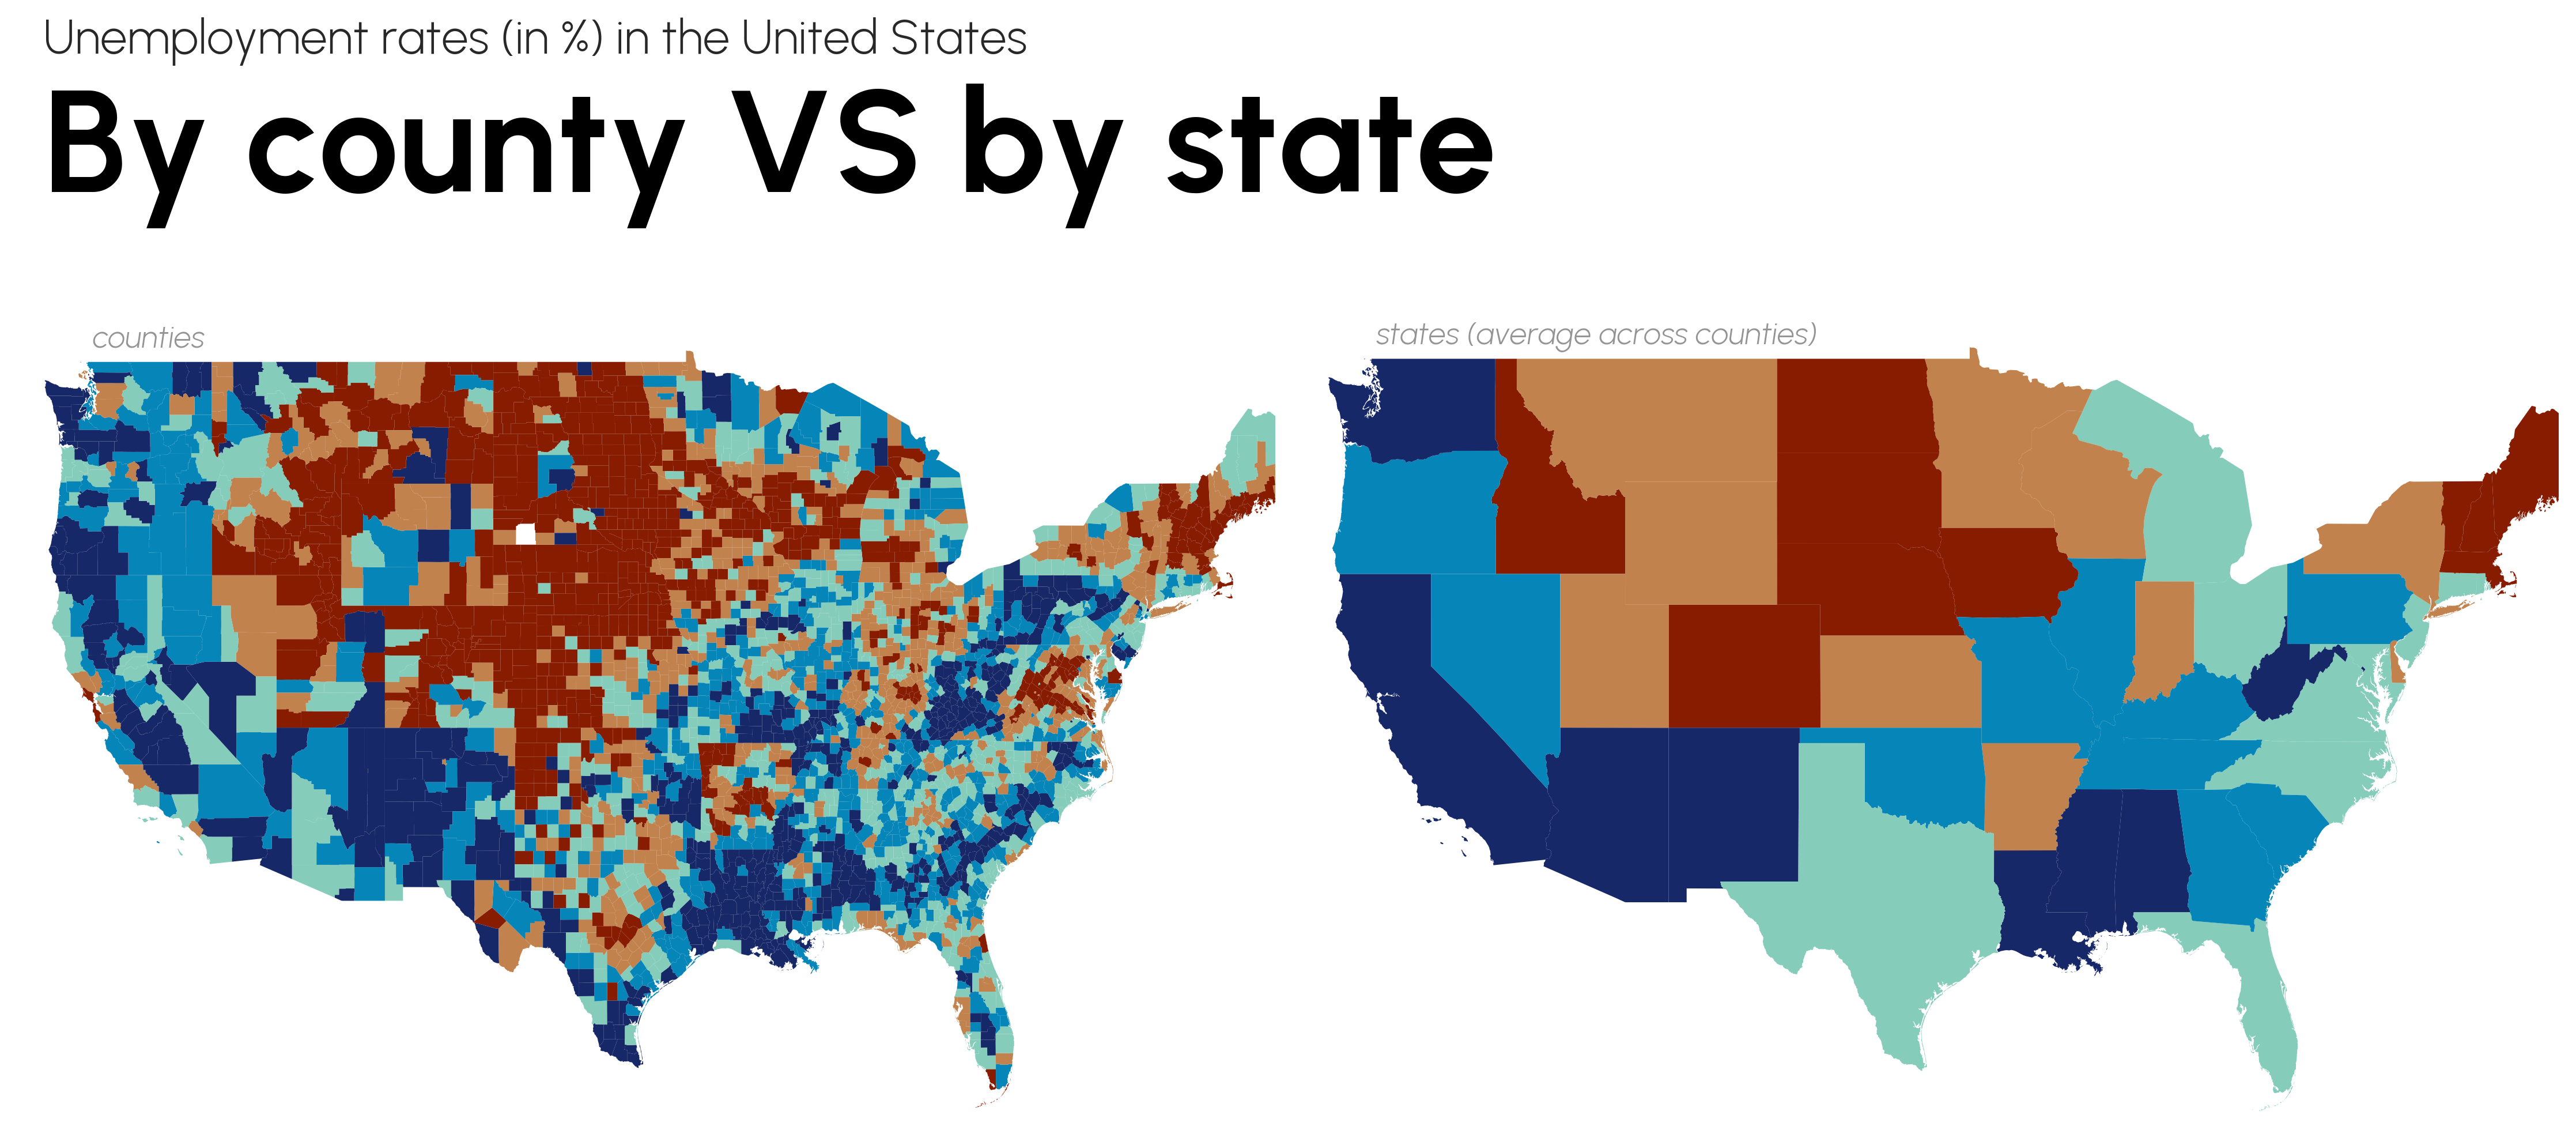

In [9]:
cmap = load_cmap("Coconut", cmap_type="continuous")

fig, axs = plt.subplots(ncols=2, dpi=300, figsize=(15, 10))

map_args = dict(column="quartile", cmap=cmap)
test = uscounties.plot(ax=axs[0], **map_args)
usstates.plot(ax=axs[1], **map_args)

metrics = ["counties", "states (average across counties)"]
for i in range(2):
    ax = axs[i]

    ax.set_xlim(-126, -68)
    ax.set_ylim(24, 50)
    ax.set_axis_off()

    ax.text(
        x=0.06,
        y=0.98,
        s=f"{metrics[i]}",
        transform=ax.transAxes,
        size=13,
        font=fontitalic,
        color="#949494",
    )

fig.text(x=0.02, y=0.81, s="By county VS by state", ha="left", size=60, font=fontbold)
fig.text(
    x=0.02,
    y=0.89,
    s="Unemployment rates (in %) in the United States",
    ha="left",
    size=20,
    font=fontlight,
    color="#282828",
)

plt.tight_layout()
plt.show()

## Legend

This step is a little more complex than the previous one, as it requires the use of matplotlib's `Patch` class.

First, we define the extent of each block in the legend:


In [10]:
quartile_ranges = [
    (uscounties["rate"].quantile(0), uscounties["rate"].quantile(0.2)),
    (uscounties["rate"].quantile(0.2), uscounties["rate"].quantile(0.4)),
    (uscounties["rate"].quantile(0.4), uscounties["rate"].quantile(0.6)),
    (uscounties["rate"].quantile(0.6), uscounties["rate"].quantile(0.8)),
    (uscounties["rate"].quantile(0.8), uscounties["rate"].quantile(1)),
]
quartile_ranges

[(np.float64(1.6), np.float64(3.7)),
 (np.float64(3.7), np.float64(4.6)),
 (np.float64(4.6), np.float64(5.4)),
 (np.float64(5.4), np.float64(6.6)),
 (np.float64(6.6), np.float64(26.4))]

We then create a list of legend elements (a list of squares of different colours):


In [11]:
from matplotlib.patches import Patch

legend_elements = [
    Patch(
        facecolor=cmap.colors[i],
        edgecolor="none",
    )
    for i in range(5)
]
legend_elements

Finally, we add the legend elements using the `legend()` function, and the labels that go with them using the `ax.text()` function:


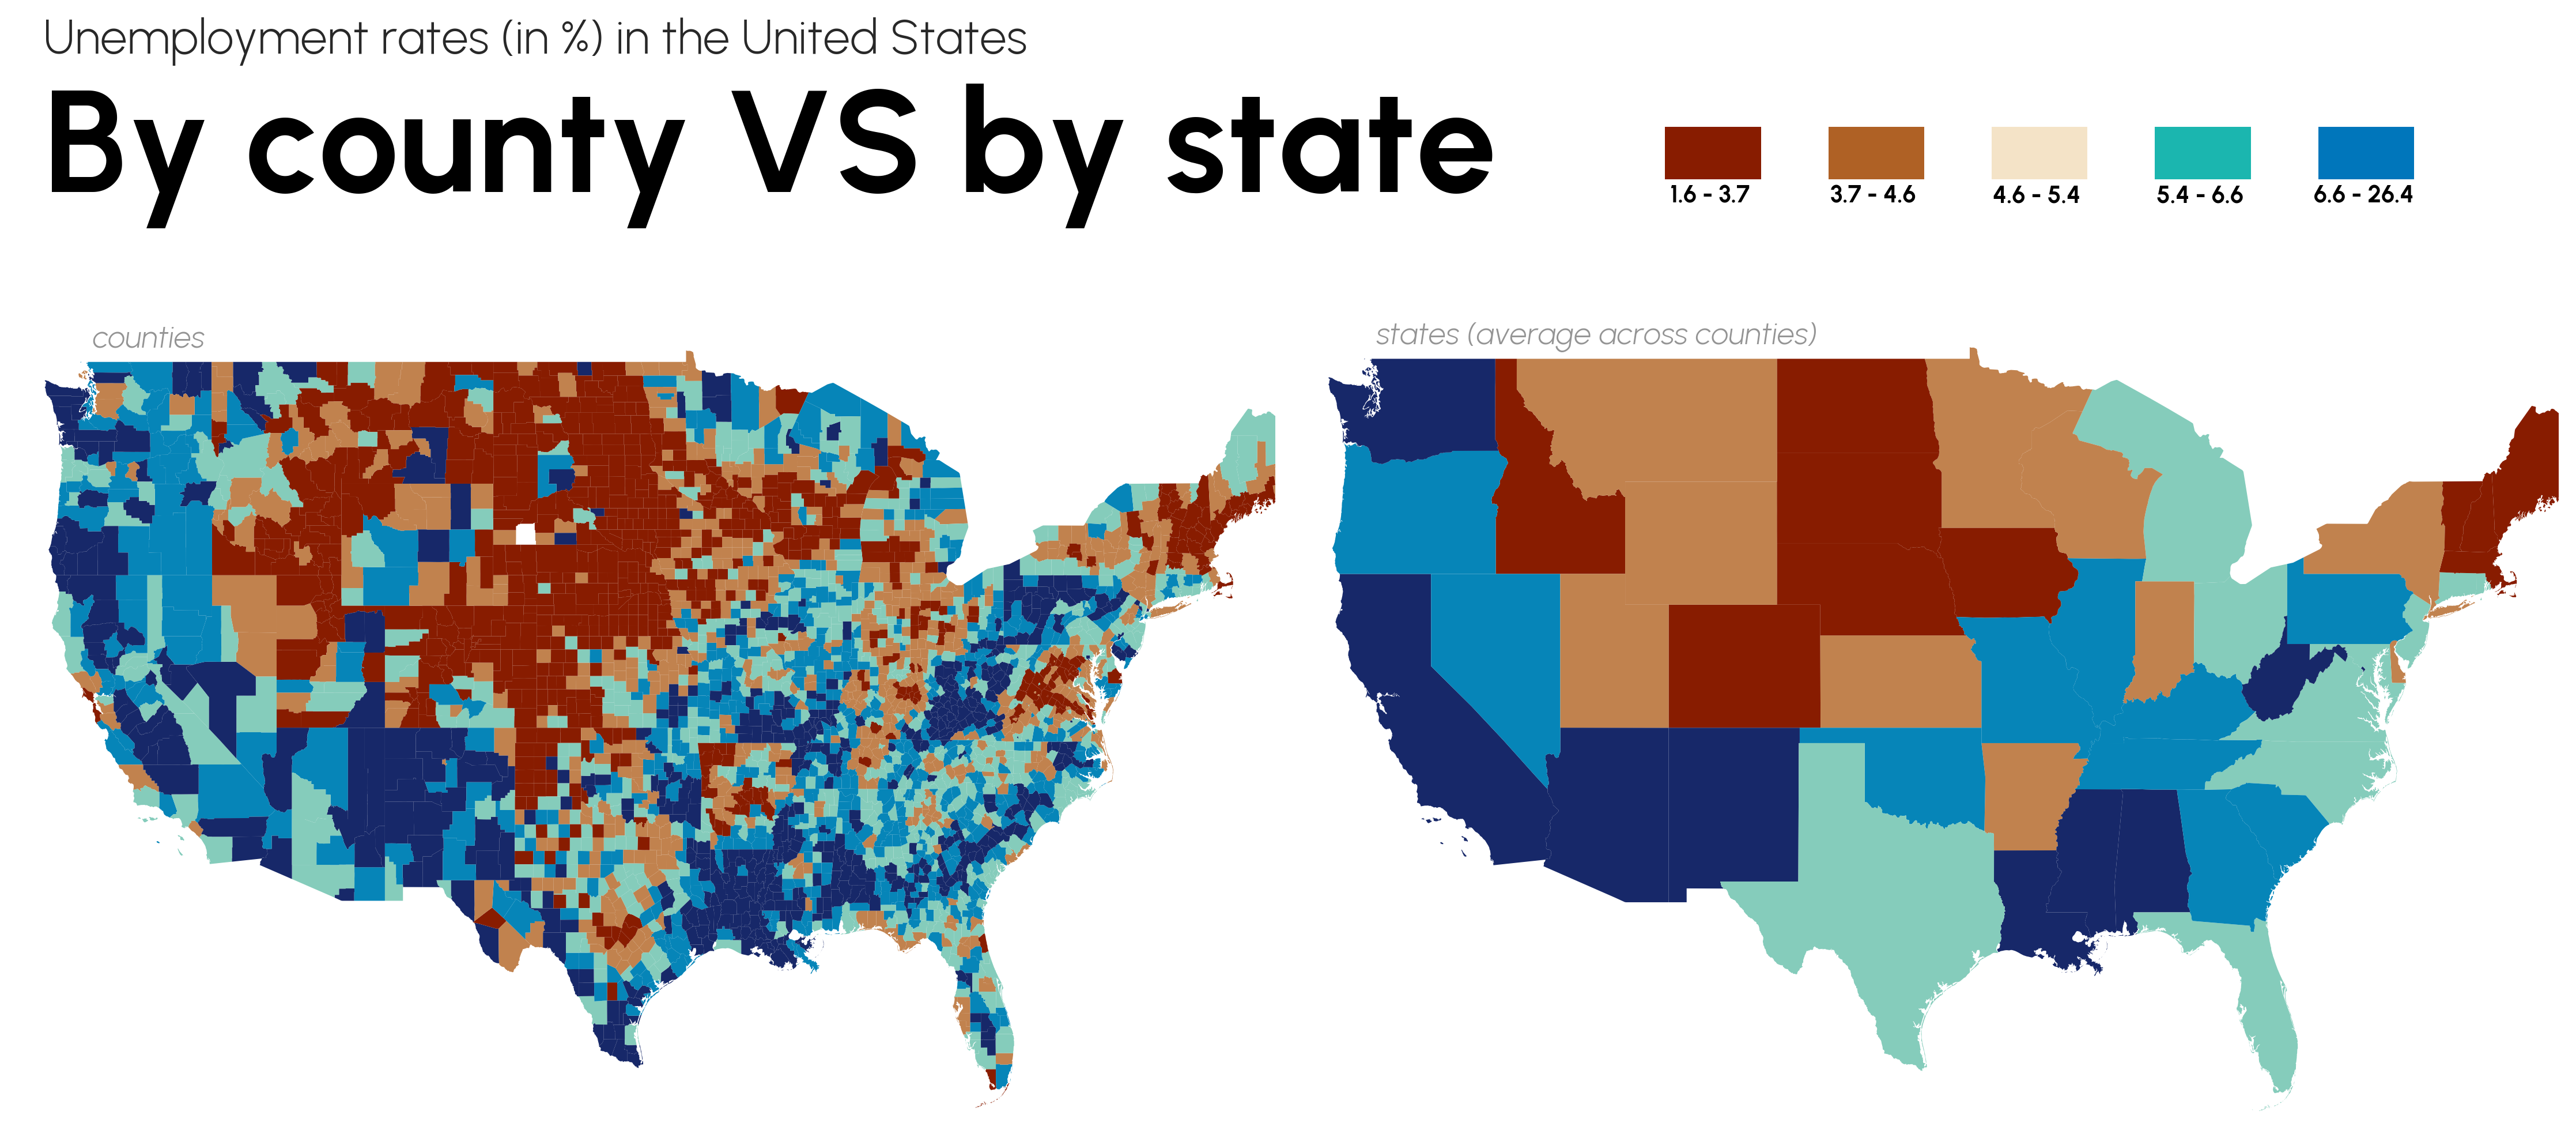

In [12]:
cmap = load_cmap("Coconut", cmap_type="continuous")

fig, axs = plt.subplots(ncols=2, dpi=300, figsize=(15, 10))

map_args = dict(column="quartile", cmap=cmap)
test = uscounties.plot(ax=axs[0], **map_args)
usstates.plot(ax=axs[1], **map_args)

metrics = ["counties", "states (average across counties)"]
for i in range(2):
    ax = axs[i]

    ax.set_xlim(-126, -68)
    ax.set_ylim(24, 50)
    ax.set_axis_off()

    ax.text(
        x=0.06,
        y=0.98,
        s=f"{metrics[i]}",
        transform=ax.transAxes,
        size=13,
        font=fontitalic,
        color="#949494",
    )

fig.text(x=0.02, y=0.81, s="By county VS by state", ha="left", size=60, font=fontbold)
fig.text(
    x=0.02,
    y=0.89,
    s="Unemployment rates (in %) in the United States",
    ha="left",
    size=20,
    font=fontlight,
    color="#282828",
)

for i, element in enumerate(legend_elements):
    axs[1].text(
        0.325 + i * 0.13,
        1.18,  # Adjust the x, y positions
        f"{quartile_ranges[i][0]:.1f} - {quartile_ranges[i][1]:.1f}",
        horizontalalignment="center",
        verticalalignment="top",
        transform=axs[1].transAxes,
        font=fontbold,
    )

fig.legend(
    handles=legend_elements,
    bbox_to_anchor=(0.95, 0.86),
    prop=fontbold,
    handlelength=4,
    fancybox=False,
    frameon=False,
    handleheight=3,
    labelspacing=0.8,
    ncol=len(legend_elements),
    labels=[""] * len(legend_elements),
)

plt.tight_layout()
plt.savefig(
    "../../static/graph/web-two-maps-with-different-granulaties.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()


## Going further

This post shows how to create a **double maps** with different granularities.

You might be interested in:

- creating [legends for choropleth maps](/web-map-with-custom-legend)
- how to make a [bubble map](/web-bubble-map-with-arrows)
- how to combine a [choropleth map and a barplot](/web-combine-choropleth-map-with-barplot)
